#                                                Titanic Survival Prediction

The sinking of the Titanic stands as one of the most tragic and well-known maritime disasters in history.

On April 15, 1912, during its highly anticipated maiden voyage, the "unsinkable" RMS Titanic struck an iceberg and sank. This catastrophic event led to the loss of 1,502 out of the 2,224 passengers and crew, largely due to a shortage of lifeboats.

While sheer luck played a role in determining who survived, certain groups had better chances than others.

Our challenge is to build a predictive model to uncover the factors that influenced survival rates. By analyzing passenger data—such as name, age, gender, and socio-economic class—we aim to answer the question: "What sorts of people were more likely to survive?"

In [65]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2,mutual_info_classif
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [66]:
data=pd.read_csv("C:\\Users\\Dell Latitude 3410\\Downloads\\Titanic-Dataset.csv")

In [67]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Pre-Processing Data

In [69]:
data_sample = data.sample(10)
data_sample.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q


In [70]:
data.shape

(891, 12)

In [71]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [72]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
data.index

RangeIndex(start=0, stop=891, step=1)

In [74]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [75]:
data.Age.fillna(data.Age.mean(),inplace=True)

In [76]:
data=data.drop(['Cabin'], axis=1)

In [77]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [78]:
data["Embarked"].nunique()

3

In [79]:
Embarked = data['Embarked'].value_counts().reset_index()
Embarked

,Embarked,count
0,S,644
1,C,168
2,Q,77


In [80]:
data["Age"].nunique()

89

In [81]:
Age = data['Age'].value_counts().reset_index()
Age

,Age,count
0,29.699118,177
1,24.000000,30
2,22.000000,27
3,18.000000,26
4,28.000000,25
...,...,...
84,36.500000,1
85,55.500000,1
86,0.920000,1
87,23.500000,1


In [82]:
Sex = data['Sex'].value_counts().reset_index()
Sex

,Sex,count
0,male,577
1,female,314


In [83]:
SibSp = data['SibSp'].value_counts().reset_index()
SibSp

,SibSp,count
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


In [84]:
Parch = data['Parch'].value_counts().reset_index()
Parch

,Parch,count
0,0,678
1,1,118
2,2,80
3,5,5
4,3,5
5,4,4
6,6,1


In [85]:
Pclass = data['Pclass'].value_counts().reset_index()
Pclass

,Pclass,count
0,3,491
1,1,216
2,2,184


In [86]:
data.values

array([[1, 0, 3, ..., 'A/5 21171', 7.25, 'S'],
       [2, 1, 1, ..., 'PC 17599', 71.2833, 'C'],
       [3, 1, 3, ..., 'STON/O2. 3101282', 7.925, 'S'],
       ...,
       [889, 0, 3, ..., 'W./C. 6607', 23.45, 'S'],
       [890, 1, 1, ..., '111369', 30.0, 'C'],
       [891, 0, 3, ..., '370376', 7.75, 'Q']], dtype=object)

In [87]:
type(data)

pandas.core.frame.DataFrame

In [88]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
dtype: int64

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [90]:
data["Sex"]=data["Sex"].map({"male":1,"female":0})
data["Embarked"]=data["Embarked"].map({"S":0,"C":1,"Q":2})

In [91]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0


In [92]:
le=LabelEncoder()
data["Name"]=le.fit_transform(data["Name"])
data["Ticket"]=le.fit_transform(data["Ticket"])

In [93]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,0.0
1,2,1,1,190,0,38.0,1,0,596,71.2833,1.0
2,3,1,3,353,0,26.0,0,0,669,7.9250,0.0
3,4,1,1,272,0,35.0,1,0,49,53.1000,0.0
4,5,0,3,15,1,35.0,0,0,472,8.0500,0.0


In [94]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

In [95]:
data["Embarked"].isnull().sum()

0

In [96]:
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,0.361392
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,1.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    float64
dtypes: float64(3), int32(2), int64(6)
memory usage: 69.7 KB


In [98]:
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)#they are unique identifiers

In [99]:
features=data.drop("Survived",axis=1)
target=data["Survived"]


In [100]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0.0
1,1,0,38.0,1,0,71.2833,1.0
2,3,0,26.0,0,0,7.9250,0.0
3,1,0,35.0,1,0,53.1000,0.0
4,3,1,35.0,0,0,8.0500,0.0


In [101]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Visualization

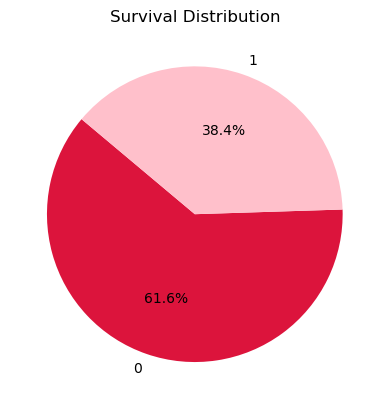

In [102]:
# Count the number of survivors and non-survivors
data1 = data["Survived"].value_counts().reset_index()
data1.columns = ["Survived", "Count"]
colors =['crimson','pink']
plt.pie(data1["Count"], labels=data1["Survived"], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Survival Distribution")
plt.show()


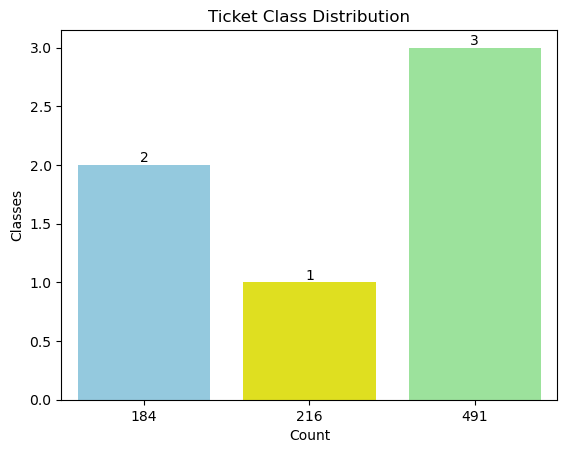

In [103]:
# Count the number of passengers in each class
data2 = data["Pclass"].value_counts().reset_index()
data2.columns = ["Pclass", "Count"]
bar2 = sns.barplot(x=data2["Count"], y=data2["Pclass"], palette=['skyblue', 'yellow', 'lightgreen'])
bar2.bar_label(bar2.containers[0])
plt.title("Ticket Class Distribution")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

C:\Users\Dell Latitude 3410\AppData\Local\Temp\ipykernel_7928\3576519911.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Pclass'] == class_label]['Age'], shade=True, color=colors[i], label=f'Class {class_label}')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell Latitude 3410\AppData\Local\Temp\ipykernel_7928\3576519911.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Pclass'] == class_label]['Age'], shade=True, color=colors[i], label=f'Class {class_label}')
C:\ProgramData\anaconda3\Lib\s

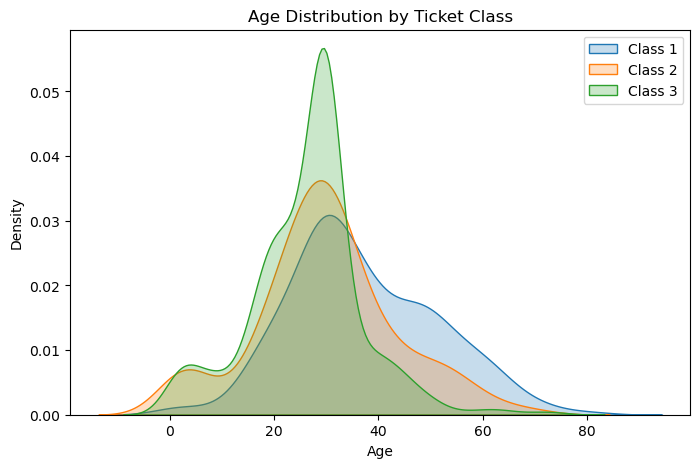

In [104]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
for i, class_label in enumerate(sorted(data['Pclass'].unique())):
    sns.kdeplot(data[data['Pclass'] == class_label]['Age'], shade=True, color=colors[i], label=f'Class {class_label}')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution by Ticket Class")
plt.legend()
plt.show()

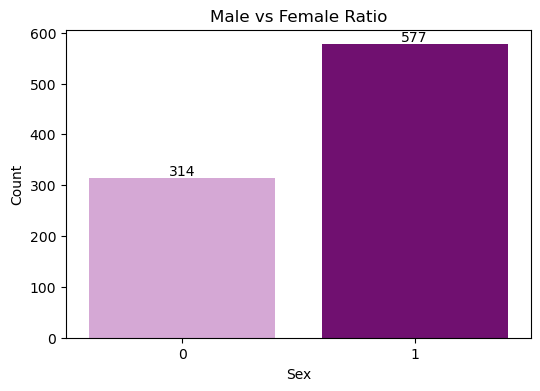

In [105]:
data3 = data["Sex"].value_counts().reset_index()
data3.columns = ["Sex", "Count"]
colors = ['plum', 'purple'] 
# Create countplot for Male vs Female ratio
plt.figure(figsize=(6, 4))  
bar3 = sns.countplot(x="Sex", data=data, palette=colors)
for p in bar3.patches:
    bar3.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.title("Male vs Female Ratio")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

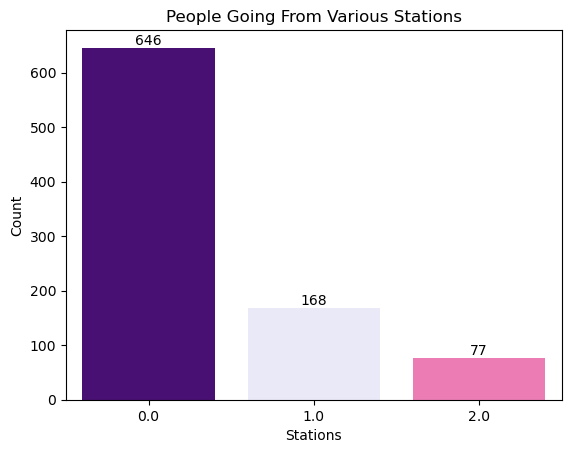

In [106]:
data4=data["Embarked"].value_counts().reset_index()
data4.columns=["Embarked","Count"]
bar4=sns.barplot(x=data4["Embarked"],y=data4["Count"],palette=['indigo','lavender','hotpink'])
bar4.bar_label(bar4.containers[0])
plt.title("People Going From Various Stations")
plt.xlabel("Stations")
plt.ylabel("Count")
plt.show()

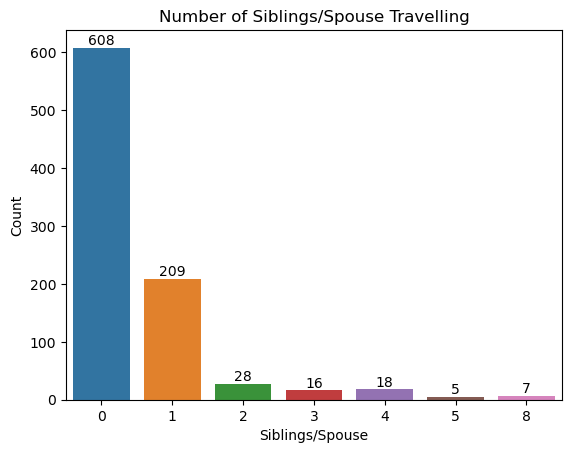

In [107]:
data5=data["SibSp"].value_counts().reset_index()
data5.columns=["SibSp","Count"]
bar5=sns.barplot(x=data5["SibSp"],y=data5["Count"])
bar5.bar_label(bar5.containers[0])
plt.title("Number of Siblings/Spouse Travelling")
plt.xlabel("Siblings/Spouse")
plt.ylabel("Count")
plt.show()

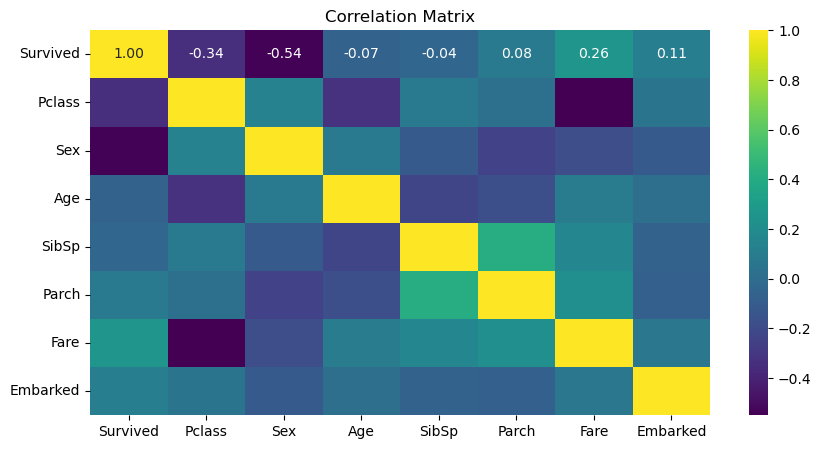

In [108]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),fmt=".2f",annot=True,cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

# Statistical Analysis


In [109]:
chi_test=chi2(features,target)

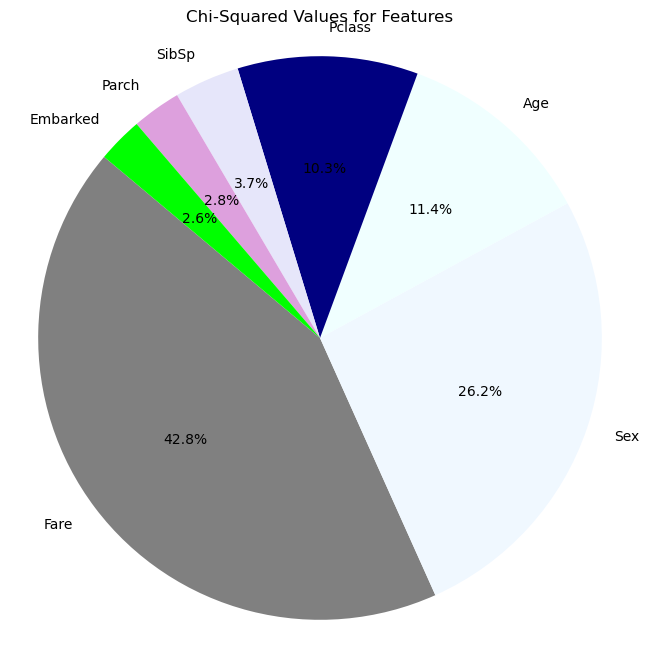

In [110]:
# Initialize lists to store feature names and chi-squared values
feature_names = []
chi2_values = []
for feature in features.columns:
    # Create a contingency table for the current feature and target
    contingency_table = pd.crosstab(features[feature], target)

    # Perform chi-squared test and get the chi-squared statistic only
    chi2_stat = chi2_contingency(contingency_table)[0]
    
    # Append feature name and chi-squared value
    feature_names.append(feature)
    chi2_values.append(chi2_stat)  # Append chi-squared statistic

# Create a DataFrame from chi-squared values
df1 = pd.DataFrame({"Feature": feature_names, "F_Values": chi2_values})
df1.sort_values(by="F_Values", ascending=False, inplace=True)
df1["F_Values"] = df1["F_Values"].round(3)

# Plotting pie chart
plt.figure(figsize=(8, 8))
colors=['grey','aliceblue','azure','navy','lavender','plum','lime']
plt.pie(df1["F_Values"], labels=df1["Feature"], autopct='%1.1f%%',colors=colors, startangle=140)
plt.title('Chi-Squared Values for Features')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


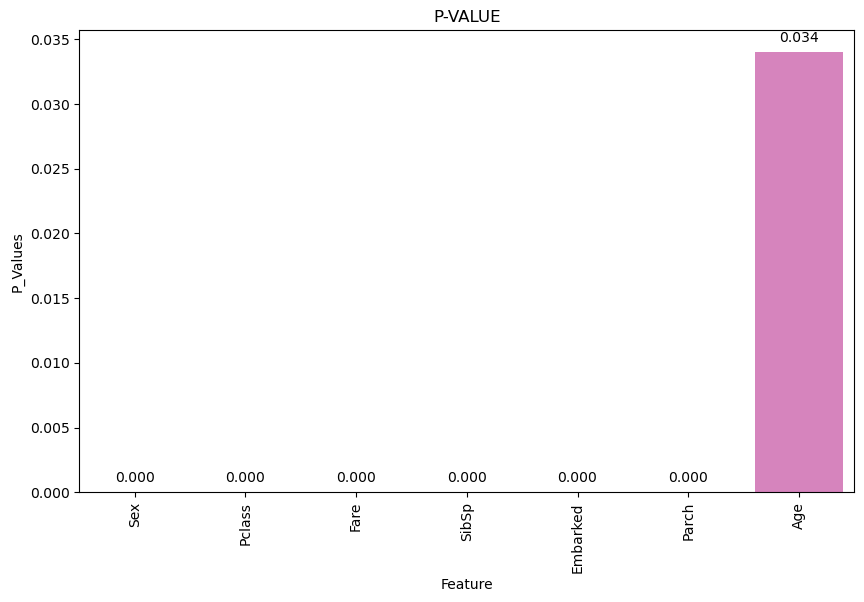

In [111]:
# Initialize lists to store feature names and p-values
feature_names = []
p_values = []

# Iterate over each feature
for feature in features.columns:
    # Create a contingency table for the current feature and target
    contingency_table = pd.crosstab(features[feature], target)
    
    # Perform chi-squared test and get the p-value
    _, p_val, _, _ = chi2_contingency(contingency_table)
    
    # Append feature name and p-value
    feature_names.append(feature)
    p_values.append(p_val)  # Append p-value

# Create a DataFrame from p-values
df2 = pd.DataFrame({"Feature": feature_names, "P_Values": p_values})
df2.sort_values(by="P_Values", inplace=True)
df2["P_Values"] = df2["P_Values"].round(3)

# Plotting
plt.figure(figsize=(10, 6))
bar11 = sns.barplot(x="Feature", y="P_Values", data=df2)
for p in bar11.patches:
    bar11.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')

plt.title("P-VALUE")
plt.xticks(rotation=90)  # Rotate x-labels for better readability if needed
plt.show()


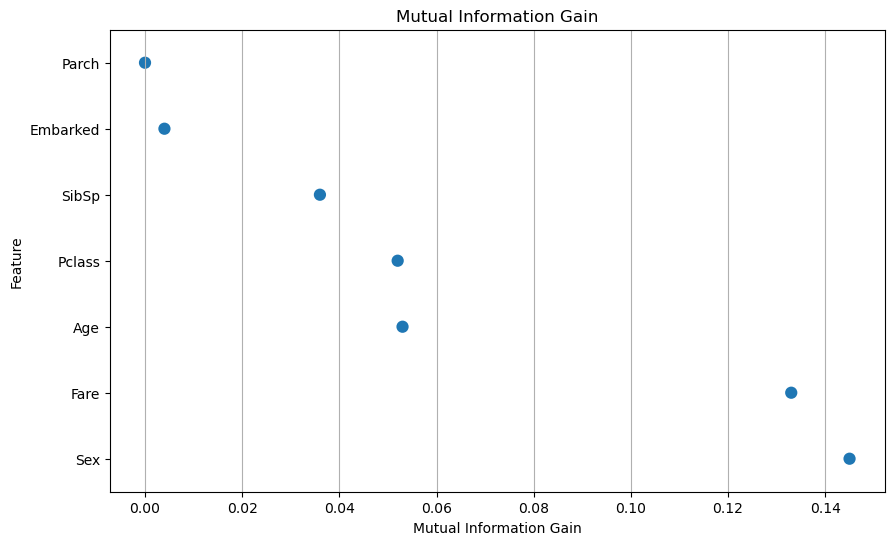

In [112]:
# Compute mutual information gain for each feature
mutual_info_values = mutual_info_classif(features, target)
mutual_info_series = pd.Series(mutual_info_values, index=features.columns)
df3 = pd.DataFrame({"Feature": mutual_info_series.index, "Values": mutual_info_series.values})
df3.sort_values(by="Values", inplace=True)
df3["Values"] = df3["Values"].round(3)

# Plotting
plt.figure(figsize=(10, 6))
point_plot = sns.pointplot(x="Values", y="Feature", data=df3, join=False)
point_plot.set_title("Mutual Information Gain")
plt.xlabel("Mutual Information Gain")
plt.ylabel("Feature")
plt.grid(True, axis='x')  # Add gridlines on x-axis
plt.show()


In [113]:
features.drop(["SibSp","Parch"],axis=1,inplace=True)

In [114]:
features.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22.0,7.2500,0.0
1,1,0,38.0,71.2833,1.0
2,3,0,26.0,7.9250,0.0
3,1,0,35.0,53.1000,0.0
4,3,1,35.0,8.0500,0.0


# Training -Testing the Data

In [115]:
# Split data into features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
X_train.shape

(712, 7)

In [118]:
X_test.shape

(179, 7)

In [119]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
# Use a smaller subset of the data for hyperparameter tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)


In [121]:
# Hyperparameter tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

In [122]:
gbc = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_subset, y_train_subset)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.05],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, verbose=2)

In [123]:
# Best parameters from RandomizedSearchCV
print(f'Best Parameters: {random_search.best_params_}')


Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}


In [124]:
# Train the final model with the best parameters on the full training set
best_gbc = GradientBoostingClassifier(**random_search.best_params_, random_state=42)
best_gbc.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=5, random_state=42)

In [125]:
# Make predictions on the test set
y_pred = best_gbc.predict(X_test)

In [126]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


In [127]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [128]:
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[92 13]
 [20 54]]


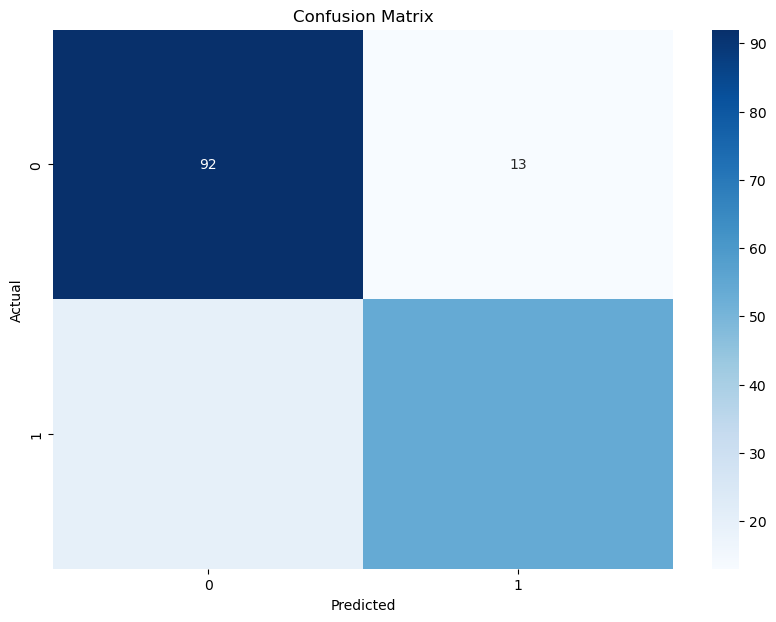

In [129]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [130]:
# Printing the predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(predictions_df.head(10))

     Actual  Predicted
709       1          0
439       0          0
840       0          0
720       1          1
39        1          1
290       1          1
300       1          1
333       0          0
208       1          1
136       1          1
